In [1]:
#  импортируем необходимые библиотеки для работы с массивами чисел и для визуализации
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# х - аргумент в нашей функции. 
# передадим начало и конец числового отрезка нашей функции и шаг аргумента:
x = np.arange(0.1, 1.75, 0.01) # массив значений аргумента

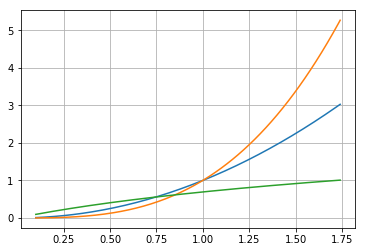

In [3]:
# построение графика параболы
plt.plot(x, x**2) 
plt.plot(x, x**3) 
plt.plot(x, np.log(x+1)) 

# включим сетку на графике 
plt.grid(True)

# показать график
plt.show() 

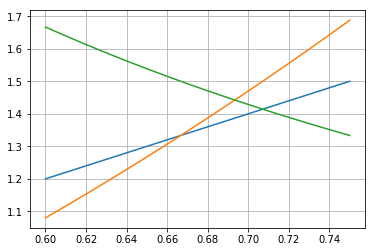

In [3]:
x = np.arange(0.6, 0.75, 0.01)
plt.plot(x, 2*x) 
plt.plot(x, 3*x**2) 
plt.plot(x, 1/x) 
plt.grid(True)
plt.show() 

## 3.7. Функция многих переменных

### Задание 3.7.1
$ f(x,y) = \sqrt{x^2 + y^2} $  
1) Вычислите $f(2,1)$. Ответ округлите до сотых.

In [5]:
round(np.sqrt(4+1),2)

2.24

### Задание 3.7.2.

In [6]:
round(1/(1+np.exp(-4)),2)

0.98

In [7]:
round(1/(1+np.exp(-2)),2)

0.88

### Задание

In [9]:
w_0=1
w_1=1
L = (2.1 - w_0 - w_1)**2 + (2.9 - w_0 - 3*w_1)**2 + (4.1 - w_0 - 5*w_1)**2

## Задание 3.9.4

Пусть дан одномерный массив `f = np.array([8, 2, 8, 3, 5, 6, 5, 15])`

Вычислите градиент массива f, увеличив шаг сетки в 7 раз, и укажите значение 7-го элемента массива f получившихся градиентов.

In [19]:
f = np.array([8, 2, 8, 3, 5, 6, 5, 15])
np.gradient(f,7)[7]

1.4285714285714286

## Задание 3.10.2
Вычислите матрицу Гессе для  функции из Задания 3.7.3  
$ L = (2.1 − w_0 − w_1)^2 + (2.9 − w_0 − 3w_1)^2 + (4.1 − w_0 − 5w_1)^2$

## Бонус. Оптимизация на практике (Python)


Общий интерфейс для решения задач как условной, так и безусловной оптимизации в пакете `scipy.optimize` предоставляется функцией `minimize()`. Однако известно, что универсального способа для решения всех задач не существует, поэтому выбор подходящего метода как всегда ложится на плечи исследователя.

Подходящий алгоритм оптимизации задаётся с помощью аргумента функции `minimize(..., method="")`.

Функция `minimize` из пакета `scipy.optimize` предоставляет общий интерфейс для решения задач условной и безусловной минимизации скалярных функций нескольких переменных. Чтобы продемонстрировать её работу, нам понадобится подходящая функция нескольких переменных, которую мы будем минимизировать.

Для этих целей прекрасно подойдет **функция Розенброка** от $N$ переменных, которая имеет вид:

$$f(x) = \sum_{i=1}^{N-1}\left [ 100 \left ( x_{i+1} - x_{i}^{2} \right)^{2} - \left ( 1 - x_{i} \right )^{2}) \right ]$$

Несмотря на то, что функция Розенброка и её матрицы Якоби и Гессе (первой и второй производной соответственно) уже определены в пакете `scipy.optimize`, определим её самостоятельно.

In [2]:
def rosen(x):
# Функция Розенброка
    return np.sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0, axis=0)

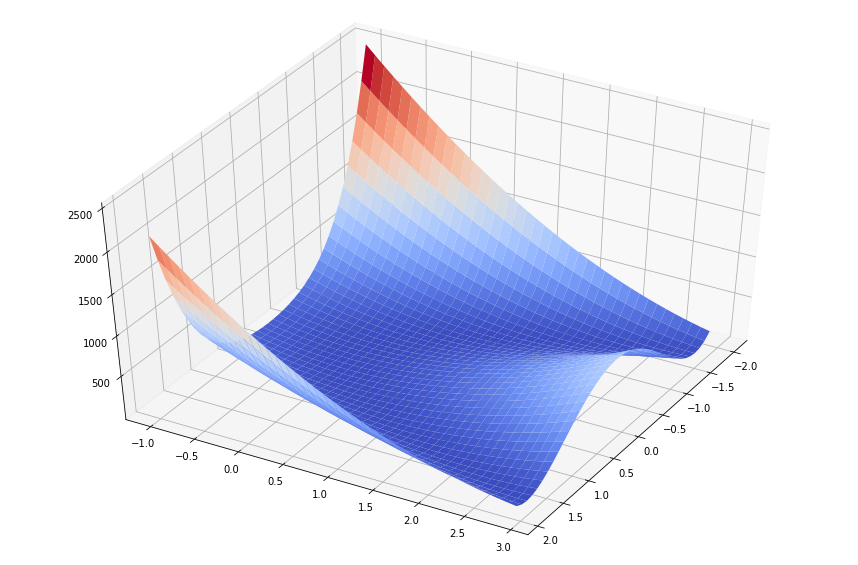

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# Настраиваем 3D график
fig = plt.figure(figsize=[15, 10])
ax = fig.gca(projection='3d')

# Задаем угол обзора
ax.view_init(45, 30)

# Создаем данные для графика
X = np.arange(-2, 2, 0.1)
Y = np.arange(-1, 3, 0.1)
X, Y = np.meshgrid(X, Y)
Z = rosen(np.array([X,Y]))

# Рисуем поверхность
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
plt.show()


### Метод Пауэлла
Алгоритмом оптимизации, в котором вычисляются только значения функций, является метод Пауэлла. Чтобы использовать его, нужно установить `method = 'powell'` в функции `minim`.

In [4]:
from scipy.optimize import minimize 
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen, x0, method='powell',
    options={'xtol': 1e-8, 'disp': True})
print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 1622
[1. 1. 1. 1. 1.]


### Симплекс-метод Нелдера-Мида (Nelder-Mead)
Пусть имеется начальная точка x0 в 5-мерном пространстве. Найдём ближайшую к ней точку минимума функции Розенброка с помощью алгоритма симплекса Nelder-Mead (алгоритм указан в качестве значения параметра `method`):

In [5]:
from scipy.optimize import minimize
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen, x0, method='nelder-mead',
    options={'xtol': 1e-8, 'disp': True})
print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571
[1. 1. 1. 1. 1.]


Симплекс-метод является самым простым способом свести к минимуму явно определенную и довольно гладкую функцию. Он не требует вычисления производных функции, достаточно задать только её значения. Метод Нелдера-Мида является хорошим выбором для простых задач минимизации. Однако, поскольку он не использует оценки градиента, для поиска минимума может потребоваться больше времени.

## Подвал

In [14]:
f = np.arange(0,20,2)
f**2

array([  0,   4,  16,  36,  64, 100, 144, 196, 256, 324], dtype=int32)

In [17]:
f = [0,1,0,1,3,6,9,12,12,15,12,9]

In [19]:
np.gradient(f,1)

array([ 1. ,  0. ,  0. ,  1.5,  2.5,  3. ,  3. ,  1.5,  1.5,  0. , -3. ,
       -3. ])

In [20]:
np.gradient(f,2)

array([ 0.5 ,  0.  ,  0.  ,  0.75,  1.25,  1.5 ,  1.5 ,  0.75,  0.75,
        0.  , -1.5 , -1.5 ])